In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('dataset/nbaallelo.csv', encoding='utf-8')

In [5]:
len(df)

126314

In [6]:
df.shape

(126314, 23)

In [7]:
pd.set_option('display.max.columns', None)
df.head(10)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
5,3,194611020DTF,NBA,1,1947,11/2/1946,1,0,WSC,Capitols,50,1300.0000,1320.3811,43.135952,DTF,Falcons,33,1300.0000,1279.6189,A,W,0.359935,NaN
6,4,194611020PRO,NBA,1,1947,11/2/1946,1,0,BOS,Celtics,53,1300.0000,1294.8458,40.459381,PRO,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,NaN
7,4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,1300.0000,1305.1542,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN
8,5,194611020STB,NBA,1,1947,11/2/1946,1,0,PIT,Ironmen,51,1300.0000,1295.3092,40.507980,STB,Bombers,56,1300.0000,1304.6908,A,L,0.359935,NaN
9,5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,1300.0000,1304.6908,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN


In [8]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [9]:
df.loc[
    df['fran_id']=='Lakers', 'team_id'
].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [10]:
df.loc[
    df['team_id']=='MNL', 'date_game'
].agg(('min', 'max'))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [11]:
revenue = pd.Series([5555, 7000, 1980])

In [14]:
# city_revenue.values

In [16]:
city_revenue= pd.Series(
    [4200, 8000, 6500], 
    index=['Amsterdam', 'Toronto', 'Tokyo']
)

In [17]:
city_employee_count=pd.Series(
    {'Amsterdam':5, 'Tokyo':8}
)

In [18]:
city_employee_count.index

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [19]:
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [20]:
city_data=pd.DataFrame({
    'revenue':city_revenue,
    'employee_count':city_employee_count
})

In [21]:
city_data.values

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

In [22]:
## Accessing the element

In [23]:
city_revenue

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [24]:
city_revenue['Tokyo']

6500

In [25]:
colors = pd.Series(
    ['red', 'purple', 'blue', 'green','yellow'], index=[1,2,3,5,8]
)

In [26]:
colors

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

In [27]:
colors[8]

'yellow'

In [28]:
colors.iloc[1]

'purple'

In [29]:
colors[8]
colors.loc[8]

'yellow'

In [30]:
print(city_data['revenue'])
print(city_data.revenue)

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64
Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64


In [31]:
city_data.loc['Amsterdam']

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [32]:
df.iloc[1]

gameorder                   1
game_id          194611010TRH
lg_id                     NBA
_iscopy                     1
year_id                  1947
date_game           11/1/1946
seasongame                  1
is_playoffs                 0
team_id                   NYK
fran_id                Knicks
pts                        68
elo_i                    1300
elo_n                 1306.72
win_equiv             41.7052
opp_id                    TRH
opp_fran              Huskies
opp_pts                    66
opp_elo_i                1300
opp_elo_n             1293.28
game_location               A
game_result                 W
forecast             0.359935
notes                     NaN
Name: 1, dtype: object

In [33]:
df.loc[2000:2005, ['fran_id', 'pts', 'opp_fran','opp_pts']]

,fran_id,pts,opp_fran,opp_pts
2000,Packers,83,Olympians,72
2001,Olympians,72,Packers,83
2002,Knicks,74,Sixers,77
2003,Sixers,77,Knicks,74
2004,Kings,93,Hawks,81
2005,Hawks,81,Kings,93


In [34]:
#Querying 
current_decade = df[
    df['year_id'] > 2010
]

current_decade

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.3638,1543.1600,45.141479,BOS,Celtics,88,1625.0994,1629.3031,A,L,0.264418,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.0994,1629.3031,53.754559,MIA,Heat,80,1547.3638,1543.1600,H,W,0.735582,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.1956,1502.5969,40.900764,LAL,Lakers,112,1647.6016,1649.2002,A,L,0.197632,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.6016,1649.2002,55.608730,HOU,Rockets,110,1504.1956,1502.5969,H,W,0.802368,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.0225,1630.6204,53.879230,POR,Trailblazers,106,1552.8141,1565.2162,A,L,0.485912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [35]:
df.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [36]:
df[
    (df['fran_id'] == 'Spurs') &
    (df['year_id'] > 2010)
].groupby(['year_id','game_result'])['game_id'].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

# Query

In [37]:
nba

NameError: name 'nba' is not defined

In [38]:
nba = df.copy()

In [39]:
nba.is_playoffs.value_counts()

0    118248
1      8066
Name: is_playoffs, dtype: int64

In [ ]:
nba['difference'] = df.pts - df.opp_pts

In [40]:
nba['game_location'].nunique

<bound method IndexOpsMixin.nunique of 0         H
1         A
2         H
3         A
4         H
         ..
126309    H
126310    H
126311    A
126312    H
126313    A
Name: game_location, Length: 126314, dtype: object>

In [41]:
nba["date_game"] = pd.to_datetime(nba["date_game"])

In [43]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

In [44]:
data_without_missing_columns = nba.dropna(axis=1)

In [47]:
data_without_missing_columns.shape

(126314, 22)

In [48]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count": [2, 2]},
    index=["New York", "Barcelona"]
)

In [49]:
further_city_data

,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [50]:
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [51]:
all_city_data = pd.concat([city_data, further_city_data], sort=False)

In [52]:
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


In [53]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

In [54]:
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [55]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

In [56]:
city_countries

,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [57]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)

In [58]:
%matplotlib inline

<AxesSubplot:xlabel='year_id'>

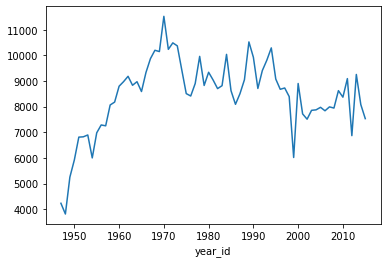

In [59]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

<AxesSubplot:>

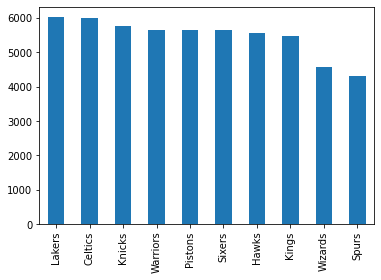

In [60]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

<AxesSubplot:xlabel='year_id'>

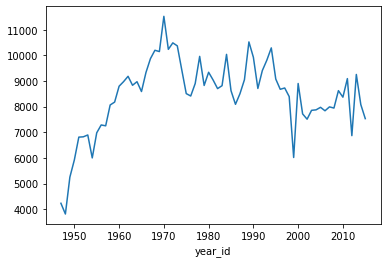

In [62]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()